In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%pprint
%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

import scraping_utils
wikipedia = scraping_utils.wikipedia

from bs4 import BeautifulSoup as bs
import networkx as nx
import re
import urllib.request

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
#pandemic_df = s.load_object('pandemic_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

dir()

Pretty printing has been turned OFF
C:\Users\dev\Documents\repositories\notebooks\covid19\ipynb\State and National Provisional Counts.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'nx', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'print_all_files_ending_with', 'print_all_files_st

In [3]:

tables_url = 'https://www.cdc.gov/nchs/nvss/vsrr/provisional-tables.htm'
tables_list = get_page_tables(tables_url)

[(0, (1, 3)), (1, (1, 3)), (2, (1, 3))]


In [4]:

tables_list[0]

,0,1,2
0,Monthly and 12 month-ending number of live bir...,Display by Year: All Data 2020 Data 2019 Data,Reset to default view


In [5]:

for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle') and ('state' in file_name):
        df_name = file_name.split('.')[0]
        print("{} = s.load_object('{}')".format(df_name, df_name))
        print("{}.sample(5).T".format(df_name))

nytimes_covid_19_data_us_states_df = s.load_object('nytimes_covid_19_data_us_states_df')
nytimes_covid_19_data_us_states_df.sample(5).T
states_covid19_df = s.load_object('states_covid19_df')
states_covid19_df.sample(5).T
states_covid19_lockdowns_df = s.load_object('states_covid19_lockdowns_df')
states_covid19_lockdowns_df.sample(5).T
states_current_numbers_df = s.load_object('states_current_numbers_df')
states_current_numbers_df.sample(5).T
states_effectiveness_df = s.load_object('states_effectiveness_df')
states_effectiveness_df.sample(5).T
states_hospital_capacity_df = s.load_object('states_hospital_capacity_df')
states_hospital_capacity_df.sample(5).T
states_merge_df = s.load_object('states_merge_df')
states_merge_df.sample(5).T
states_populations_df = s.load_object('states_populations_df')
states_populations_df.sample(5).T
states_population_df = s.load_object('states_population_df')
states_population_df.sample(5).T
states_race_df = s.load_object('states_race_df')
states_race_df.sam

In [6]:

states_stats_df = s.load_object('states_stats_df')
columns_list = sorted([cn for cn in states_stats_df.columns if 'pop' in cn.lower()])
states_stats_df[columns_list].sample(5).T

,Michigan,South Region,Utah,U.S. Virgin Islands,Colorado
Census_2010_Population,9.88364e+06,1.14556e+08,2.76388e+06,NaN,5.0292e+06
Census_Population_2010,9.88364e+06,NaN,2.76388e+06,NaN,5.0292e+06
Population_Estimate_2010,9.87751e+06,1.14867e+08,2.77533e+06,NaN,5.04735e+06
Population_Estimate_2011,9.88241e+06,1.16007e+08,2.81438e+06,NaN,5.12111e+06
Population_Estimate_2012,9.89714e+06,1.17241e+08,2.85338e+06,NaN,5.19265e+06
Population_Estimate_2013,9.91306e+06,1.18364e+08,2.89764e+06,NaN,5.26904e+06
Population_Estimate_2014,9.92985e+06,1.19624e+08,2.93688e+06,NaN,5.3501e+06
Population_Estimate_2015,9.93172e+06,1.20997e+08,2.98184e+06,NaN,5.45062e+06
Population_Estimate_2016,9.95057e+06,1.22352e+08,3.04187e+06,NaN,5.53922e+06
Population_Estimate_2017,9.97311e+06,1.23542e+08,3.10104e+06,NaN,5.61188e+06


In [7]:

columns_list = sorted([cn for cn in states_stats_df.columns if 'pop' in cn.lower()])
column_descriptions_df = get_column_descriptions(states_stats_df, column_list=columns_list)
mask_series = (column_descriptions_df.dtype == 'float64')
columns_list = column_descriptions_df[mask_series].column_name.tolist()
idxmax_series = states_stats_df[columns_list].idxmax(axis='columns')
pop_cn = idxmax_series.value_counts().idxmax()
pop_dict = states_stats_df[pop_cn].to_dict()

In [8]:

csv_url = 'https://data.cdc.gov/api/views/hmz2-vwda/rows.csv?accessType=DOWNLOAD'
provisional_df = pd.read_csv(csv_url, encoding=s.encoding_type)
provisional_df.columns.tolist()

['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value']

In [9]:

rename_dict = {idx.upper(): idx for idx in states_stats_df.index}

def f(x):
    if x in rename_dict:
        x = rename_dict[x]
    
    return x

provisional_df.State = provisional_df.State.map(f)

In [10]:

provisional_df['Population'] = provisional_df.State.map(lambda x: pop_dict[x])

In [11]:

import numpy as np

mask_series = provisional_df.State.isin(states_stats_df.index) & (provisional_df.State != 'United States')
mask_series = mask_series & (provisional_df.Indicator == 'Number of Deaths')
provisional_df['Deaths Per Million'] = np.nan
for row_index, row_series in provisional_df[mask_series].iterrows():
    deaths = int(row_series['Data Value'])
    try:
        pop = int(row_series['Population'])
        provisional_df.loc[row_index, 'Deaths Per Million'] = 1_000_000*deaths/pop
    except Exception as e:
        provisional_df.loc[row_index, 'Deaths Per Million'] = np.nan

In [12]:

from datetime import datetime

mask_series = (provisional_df.Period == 'Monthly')
provisional_df['Date'] = pd.NaT
date_format = '%B 1, %Y'
for row_index, row_series in provisional_df[mask_series].iterrows():
    year = int(row_series.Year)
    month = row_series.Month.strip()
    date_str = f'{month} 1, {year}'
    date_obj = datetime.strptime(date_str, date_format)
    provisional_df.loc[row_index, 'Date'] = date_obj
s.store_objects(provisional_df=provisional_df)

Pickling to C:\Users\dev\Documents\repositories\notebooks\covid19\saves\pickle\provisional_df.pickle


In [13]:

mask_series = provisional_df.State.isin(states_stats_df.index) & (provisional_df.State != 'United States')
mask_series = mask_series & (provisional_df.Indicator == 'Number of Deaths')
deaths_min = provisional_df[mask_series]['Deaths Per Million'].idxmin()
min_state = provisional_df.loc[deaths_min, 'State']
deaths_max = provisional_df[mask_series]['Deaths Per Million'].idxmax()
max_state = provisional_df.loc[deaths_max, 'State']

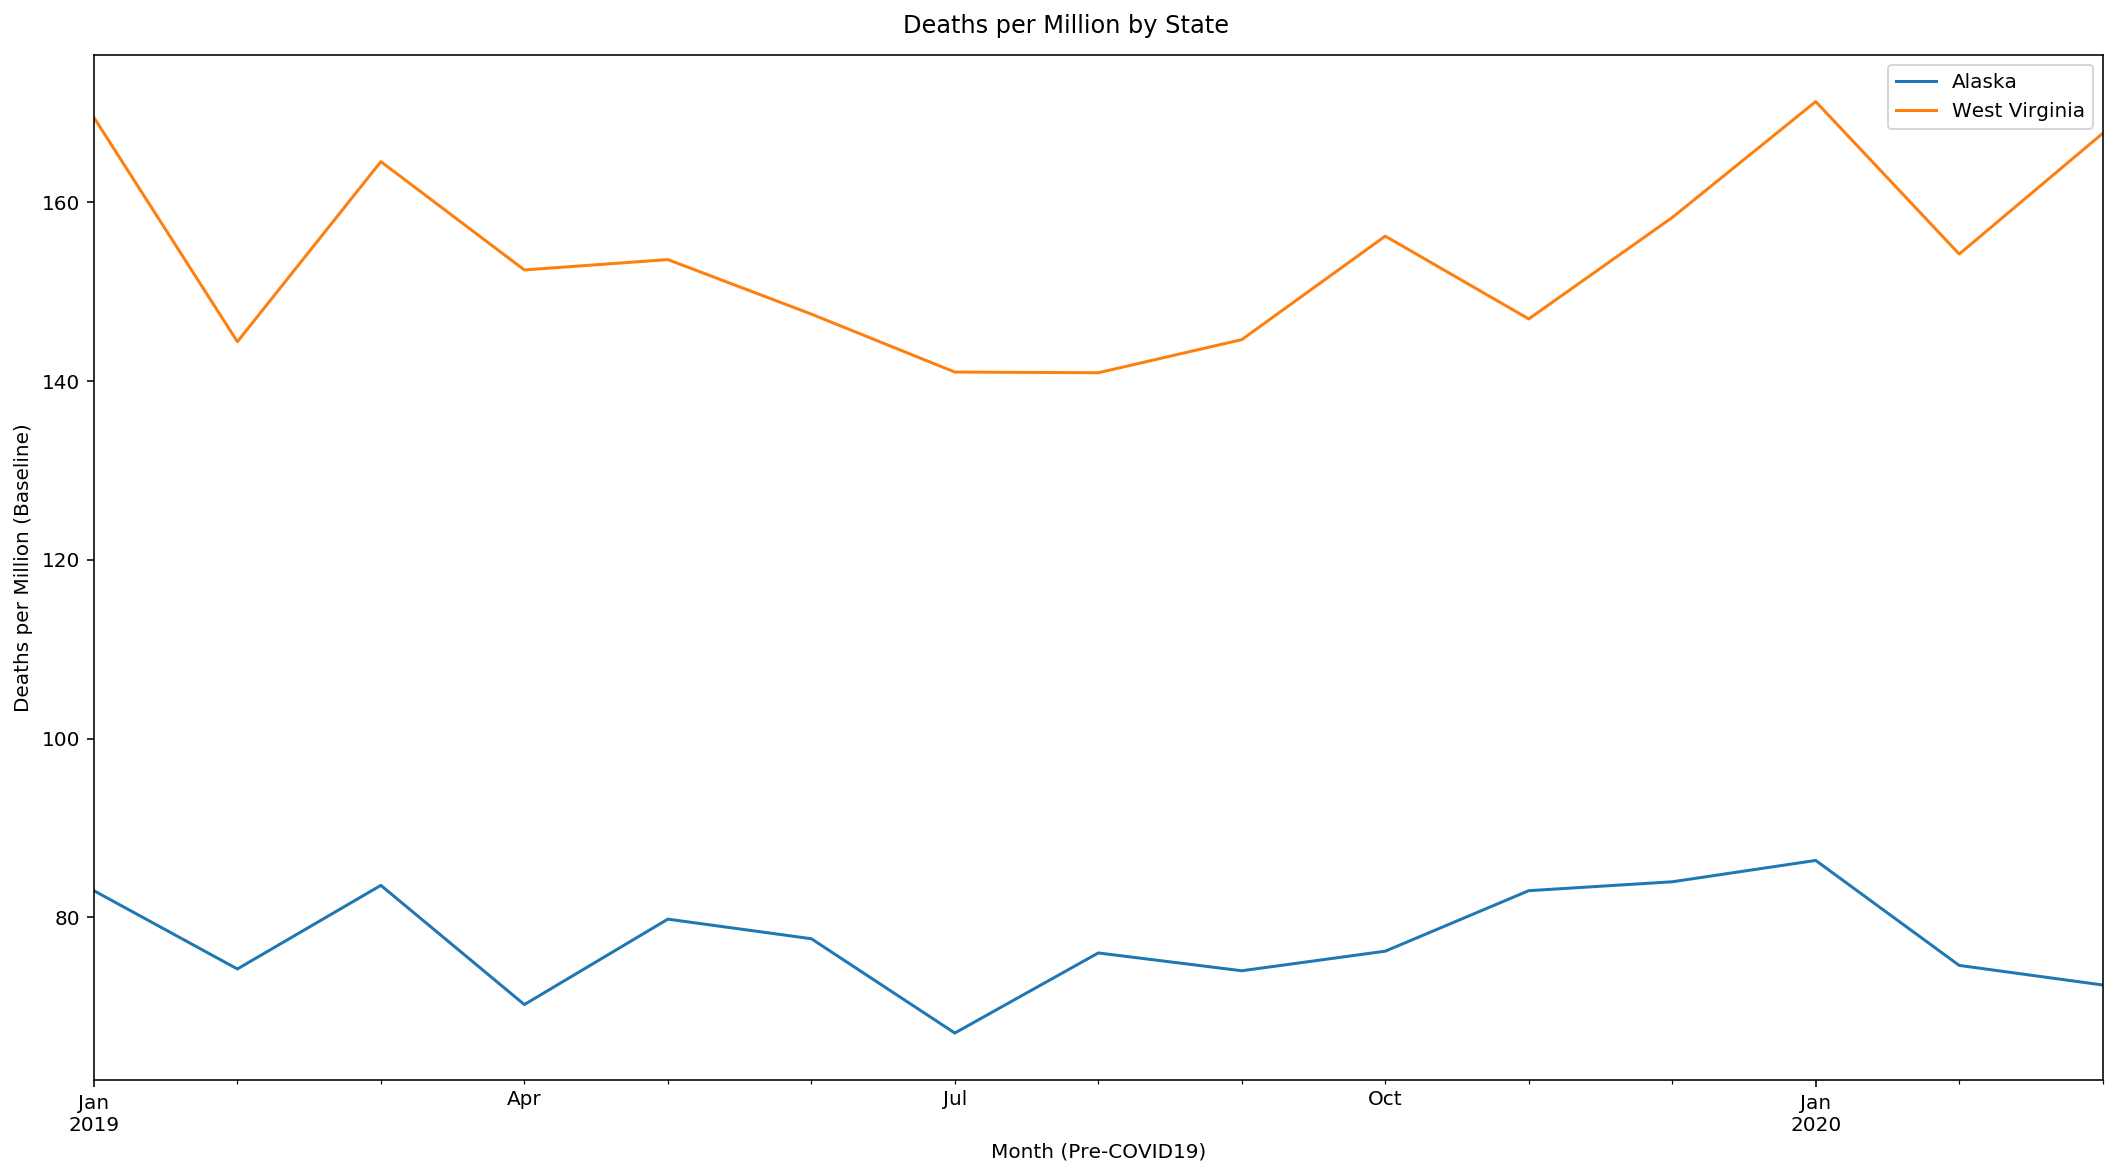

In [15]:

%run ../../load_magic/charts.py

provisional_df = s.load_object('provisional_df')
mask_series = provisional_df.State.isin(states_stats_df.index) & (provisional_df.State != 'United States')
mask_series = mask_series & (provisional_df.Indicator == 'Number of Deaths')
states_list = provisional_df[mask_series].State.unique().tolist()
fig_width = 18
fig_height = fig_width/FACEBOOK_ASPECT_RATIO
fig = plt.figure(figsize=(fig_width, fig_height))
ax = fig.add_subplot(111, autoscale_on=True)
for state_name in [min_state, max_state]:
    mask_series = (provisional_df.State == state_name) & (provisional_df.Indicator == 'Number of Deaths')
    provisional_df[mask_series].sort_values('Date').plot.line(x='Date', y='Deaths Per Million', ax=ax, label=state_name)
title_obj = fig.suptitle(t='Deaths per Million by State', x=0.5, y=0.91)
xlabel_text = plt.xlabel('Month (Pre-COVID19)')
ylabel_text = plt.ylabel('Deaths per Million (Baseline)')